In [1]:
import numpy as np
import pandas as pd
import os
import re

In [2]:
opcode_pattern = r'\s([A-Z_]{2,})\s'
initfunc_pattern = r'INIT_FCALL\s+\'([a-z_]*)\''

In [3]:
# 读取每一份代码，返回代码内容
def load_one_file(filename):
    context = ''
    with open(filename, 'r', encoding='utf-8', errors='ignore') as codes:
        for line in codes:
            line = line.strip('\r')
            context += line
    return context

# 读取目录下所有php文件的路径，返回一个路径的列表
def load_all_php_path(dir):
    filelist = []
    
#     root为dir目录地址
#     dirs是一个该文件夹下所有目录名的list
#     filelist是文件名的list
    for root, dirs, files in os.walk(dir):
        for file in files:
            if file.endswith('.php'):
                fullpath = os.path.join(root, file)
#                 print('Loading %s' % fullpath)
                filelist.append(fullpath)
    return filelist


def get_vld(codepath):
    command = 'php -dvld.active=1 -dvld.execute=0 -dvld.verbosity=3 ' + str(codepath) + ' 2>&1'
#     print(command)
    return os.popen(command).read()
    

def get_opcode(vld):
    token_list = []
    tokens=re.findall(opcode_pattern, vld)
    for token in tokens:
        if len(token) > 1:
            token_list.append(token)
    return ' '.join(token_list)

In [4]:
# load samples
file_path = './dataset-clean/'

bad_list = load_all_php_path(file_path + 'bad/')
good_list = load_all_php_path(file_path + 'good/')
print(len(bad_list))
print(len(good_list))
file_list = bad_list + good_list    #存储完整的代码路径+代码文件名
code_list = []    # 存储代码内容
label_list = []    # 存储标签
vld_list = []    # 存储vld
opcode_list = []    # 存储opcode
name_list = []    # 存储文件名

for sample in bad_list:
    code_list.append(load_one_file(sample))
    label_list.append(1)
    vld_list.append(get_vld(sample))

for sample in good_list:
    code_list.append(load_one_file(sample))
    label_list.append(0)
    vld_list.append(get_vld(sample))

for vld in vld_list:
    opcode_list.append(get_opcode(vld))

for whole_path in file_list:
    name = whole_path.split('/')[-1]
    name_list.append(name)

4352
5728


In [5]:
index = 10079

print(vld_list[index])
print(re.findall(opcode_pattern, vld_list[index]))
print(re.findall(initfunc_pattern, vld_list[index]))

Finding entry points
Branch analysis from position: 0
1 jumps found. (Code = 62) Position 1 = -2
filename:       /Users/devin/Google 云端硬盘/code/XSS_PHP_VLD/dataset-clean/good/CWE_79__shell_exec__func_rawurlencode__Use_untrusted_data_script-quoted_Event_Handler.php
function name:  (null)
number of ops:  14
compiled vars:  !0 = $tainted
line     #* E I O op                           fetch          ext  return  operands
-------------------------------------------------------------------------------------
   1     0  E >   ECHO                                                     '%3C%21DOCTYPE+html%3E%0A%3Chtml%3E%0A%3Chead%2F%3E%0A%3Cbody%3E%0A'
   6     1        INIT_FCALL                                               'shell_exec'
         2        SEND_VAL                                                 'cat+%2Ftmp%2Ftainted.txt'
         3        DO_ICALL                                         $1      
         4        ASSIGN                                                   !0, $1
  

In [8]:
filter_func_list = []
for i in range(len(vld_list)):
    func = re.findall(initfunc_pattern, vld_list[i])
    if(len(func) == 0):    # No filter
        filter_func_list.append('NO_FILTER')
        continue
    filter_func_list.append(' '.join(func).upper())

10080


In [9]:
df = pd.DataFrame({
    'file': name_list,
    'code': code_list,
    'vld': vld_list,
    'opcode': opcode_list,
    'filter': filter_func_list,
    'label': label_list
})
df.to_csv('clean_datasets.csv', index=None)

# 下面是模型部分

In [8]:
from sklearn.utils import shuffle

df = pd.read_csv('php_xss_datasets.csv')
df = shuffle(df, random_state=2020)

In [11]:
opcode_list = np.array(df['opcode'].tolist())
y = np.array(df['label'].tolist())

print(opcode_list[4])
print(df['sourcecode'][4])
print(opcode_list.shape)
print(y.shape)

ECHO NOP NEW DO_FCALL ASSIGN INIT_METHOD_CALL DO_FCALL ASSIGN INIT_FCALL SEND_VAR DO_ICALL ASSIGN CONCAT CONCAT ECHO ECHO RETURN FETCH_OBJ_R FETCH_DIM_R RETURN RETURN ASSIGN_OBJ OP_DATA FETCH_OBJ_W ASSIGN_DIM OP_DATA FETCH_R FETCH_DIM_R FETCH_OBJ_W ASSIGN_DIM OP_DATA FETCH_OBJ_W ASSIGN_DIM OP_DATA RETURN
<!-- 
Unsafe sample
input : get the field userData from the variable $_GET via an object, which store it in a array
sanitize : use of ternary condition
File : use of untrusted data in the body
-->

<!--Copyright 2015 Bertrand STIVALET 

Permission is hereby granted, without written agreement or royalty fee, to

use, copy, modify, and distribute this software and its documentation for

any purpose, provided that the above copyright notice and the following

three paragraphs appear in all copies of this software.


IN NO EVENT SHALL AUTHORS BE LIABLE TO ANY PARTY FOR DIRECT,

INDIRECT, SPECIAL, INCIDENTAL, OR CONSEQUENTIAL DAMAGES ARISING OUT OF THE 

USE OF THIS SOFTWARE AND ITS DOCUMEN

# 加入sink 转为具体形式再append

In [5]:
SINK_TYPE_DICT = {
        0: 'T_SINK_BODY_SECTION',
        1: 'T_SINK_SINGLE_QUOTE_ATTR_VAL',
        2: 'T_SINK_DOUBLE_QUOTE_ATTR_VAL',
        3: 'T_SINK_DOUBLE_QUOTE_CSS_VAL',
        4: 'T_SINK_SINGLE_QUOTE_ATTR_VAL',
        5: 'T_SINK_SINGLE_QUOTE_ATTR_VAL',
        6: 'T_SINK_DOUBLE_QUOTE_CSS_VAL',
        7: 'T_SINK_NO_QUOTE_ATTR_VAL',
        8: 'T_SINK_NO_QUOTE_CSS_VAL',
        9: 'T_SINK_SINGLE_QUOTE_JS_BLOCK',
        10: 'T_SINK_DOUBLE_QUOTE_ATTR_VAL',
        11: 'T_SINK_DOUBLE_QUOTE_EVENT_VAL',
        12: 'T_SINK_SINGLE_QUOTE_CSS_VAL',
        13: 'T_SINK_DOUBLE_QUOTE_JS_BLOCK',
        14: 'T_SINK_HTML_TAG_NAME',
        15: 'T_SINK_ATTR_NAME',
        16: 'T_SINK_SINGLE_QUOTE_JS_BLOCK'        
    }

sink_type_list = np.array(df['sink_type'].tolist()).astype('int')

opcode_n_sink_dict = dict(zip(opcode_list, sink_type_list))
    

ECHO NOP NEW DO_FCALL ASSIGN INIT_METHOD_CALL DO_FCALL ASSIGN INIT_FCALL_BY_NAME SEND_VAR_EX DO_FCALL ASSIGN CONCAT CONCAT ECHO ECHO RETURN FETCH_OBJ_R FETCH_DIM_R RETURN RETURN ASSIGN_OBJ OP_DATA FETCH_OBJ_W ASSIGN_DIM OP_DATA FETCH_R FETCH_DIM_R FETCH_OBJ_W ASSIGN_DIM OP_DATA FETCH_OBJ_W ASSIGN_DIM OP_DATA RETURN T_SINK_SINGLE_QUOTE_JS_BLOCK


TypeError: dict expected at most 1 arguments, got 2

# TF_IDF 处理词向量

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

# CV = CountVectorizer(ngram_range=(5,5), decode_error='ignore',
#                     token_pattern=r'\b\w+\b', min_df=1, max_df=1.0)
# X = CV.fit_transform(opcode_list).toarray()
# # print(X[:2])
# Tfid = TfidfTransformer(smooth_idf=False)
# tfidf_value = Tfid.fit_transform(X)
# # print(tfidf_value)
# X_tfid = np.array(tfidf_value.toarray())
# print(X_tfid.shape)

tfidf = TfidfVectorizer()
re = tfidf.fit_transform(opcode_list)
# print(re)
X_tfid = np.array(re.toarray())
print(X_tfid.shape)

(10080, 50)


In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(
    X_tfid, y, random_state=2020, test_size = 0.3, stratify=y)

# 标准化
std_scaler = StandardScaler()
X_train_std = std_scaler.fit_transform(X_train).astype('float32')
X_test_std = std_scaler.transform(X_test).astype('float32')

# # 归一化以及独热编码
# mm_scaler = StandardScaler()
# X_train_std = mm_scaler.fit_transform(X_train).astype('float32')
# X_test_std = mm_scaler.transform(X_test).astype('float32')
# y_train = to_categorical(y_train, num_classes=2)
# # y_test = to_categorical(y_test, num_classes=2)

# X_train_std, X_test_std = X_train, X_test

print(X_train_std.shape)
print(X_test_std.shape)
# print(X_test_std[:1])
# print(y_train[:10])
# print(y_test[:10])

(7056, 50)
(3024, 50)


# SVM

In [9]:
from sklearn import svm

svc = svm.SVC(kernel='linear', C=1.0, gamma='auto', probability=True, random_state=2020)  # 线性核
# svc = svm.SVC(kernel='rbf', gamma=0.7, C=1.0, probability=True, random_state=2020) # 径向基核
# svc = svm.SVC(kernel='poly', degree=3, C=1.0, gamma='auto', probability=True, random_state=2020) # 多项式核

In [24]:
svc.fit(X_train_std, y_train) 

print('Finished training.\n');

Finished training.



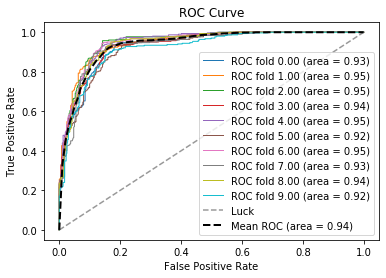

In [10]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold

%matplotlib inline

cv = StratifiedKFold(n_splits=10)    #导入该模型，后面将数据划分10份
 
# 画平均ROC曲线的两个参数
mean_tpr = 0.0              # 用来记录画平均ROC曲线的信息
mean_fpr = np.linspace(0, 1, 100)
cnt = 0
for i, (train, test) in enumerate(cv.split(X_train_std,y_train)):       #利用模型划分数据集和目标变量 为一一对应的下标
    cnt +=1
    probas_ = svc.fit(X_train_std[train], y_train[train]).predict_proba(X_train_std[test]) # 训练模型后预测每条样本得到两种结果的概率
    fpr, tpr, thresholds = roc_curve(y_train[test], probas_[:, 1])    # 该函数得到伪正例、真正例、阈值，这里只使用前两个
 
    mean_tpr += np.interp(mean_fpr, fpr, tpr)   # 插值函数 interp(x坐标,每次x增加距离,y坐标)  累计每次循环的总值后面求平均值
    mean_tpr[0] = 0.0           # 将第一个真正例=0 以0为起点
 
    roc_auc = auc(fpr, tpr)  # 求auc面积
    plt.plot(fpr, tpr, lw=1, label='ROC fold {0:.2f} (area = {1:.2f})'.format(i, roc_auc))    # 画出当前分割数据的ROC曲线

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck') # 画对角线
 
mean_tpr /= cnt   # 求数组的平均值
mean_tpr[-1] = 1.0   # 坐标最后一个点为（1,1）  以1为终点
mean_auc = auc(mean_fpr, mean_tpr)
 
plt.plot(mean_fpr, mean_tpr, 'k--',label='Mean ROC (area = {0:.2f})'.format(mean_auc), lw=2)
 
plt.xlim([-0.05, 1.05])     # 设置x、y轴的上下限，设置宽一点，以免和边缘重合，可以更好的观察图像的整体
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')    # 可以使用中文，但需要导入一些库即字体
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [11]:
from sklearn import metrics
predict_target = svc.predict(X_test_std)
print(metrics.classification_report(y_test, predict_target, 
                                    target_names=['Good sanitize', 'Bad sanitize']))

               precision    recall  f1-score   support

Good sanitize       0.93      0.85      0.89      1718
 Bad sanitize       0.82      0.92      0.87      1306

     accuracy                           0.88      3024
    macro avg       0.88      0.88      0.88      3024
 weighted avg       0.89      0.88      0.88      3024



Text(0.5, 0, 'True label')

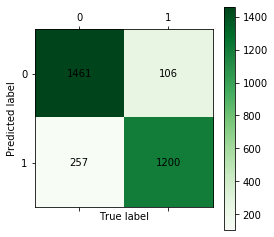

In [12]:
# Confusion matrix
%matplotlib inline

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, svc.predict(X_test_std))
plt.matshow(cm,cmap=plt.cm.Greens)
plt.colorbar()
for x in range(len(cm)):
    for y in range(len(cm)):
        plt.annotate(cm[x,y],xy=(x,y),horizontalalignment='center',verticalalignment='center')

plt.ylabel('Predicted label')# 坐标轴标签
plt.xlabel('True label')# 坐标轴标签

#  MLP

In [348]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(solver='lbfgs', alpha=1e-3, hidden_layer_sizes=(5,2), random_state=None)
mlp_clf.fit(X_train_std, y_train)

predict_target = mlp_clf.predict(X_test_std)
print(metrics.classification_report(y_test, predict_target, 
                                    target_names=['Good sanitize', 'Bad sanitize']))

               precision    recall  f1-score   support

Good sanitize       1.00      0.52      0.68      1718
 Bad sanitize       0.61      1.00      0.76      1306

     accuracy                           0.73      3024
    macro avg       0.81      0.76      0.72      3024
 weighted avg       0.83      0.73      0.72      3024



# LSTM -1

In [349]:
from tensorflow.keras.layers import Dense, LSTM, Embedding,Dropout
from tensorflow.keras.models import Sequential

X_train_std = X_train_std.reshape(-1, 1, 33)
print(X_train_std.shape)
# print(X_train_std)

batch = 4
timesteps = 1
data_dim = 33
units_size = 32
classes_num = 2

model = Sequential()
model.add(LSTM(units=units_size, dropout=0.2, recurrent_dropout=0.2,
              batch_input_shape=(batch, timesteps, data_dim),
              return_sequences=True, stateful=True, unroll=False
              )
         )
model.add(LSTM(units_size, return_sequences=True, stateful=True))
model.add(LSTM(units_size, stateful=True))
model.add(Dense(classes_num, activation='softmax'))
model.compile(loss='hinge', optimizer='adam',
             metrics=['accuracy'])

(7056, 1, 33)


In [350]:
model.fit(X_train_std, y_train, epochs=5, batch_size=batch)

Epoch 1/5
7056/7056 [==============================] - 20s 3ms/sample - loss: 1.0683 - acc: 0.5984
Epoch 2/5
7056/7056 [==============================] - 15s 2ms/sample - loss: 1.0683 - acc: 0.5862
Epoch 3/5
7056/7056 [==============================] - 15s 2ms/sample - loss: 1.0683 - acc: 0.6077
Epoch 4/5
7056/7056 [==============================] - 16s 2ms/sample - loss: 1.0683 - acc: 0.5993
Epoch 5/5
7056/7056 [==============================] - 15s 2ms/sample - loss: 1.0683 - acc: 0.5651


In [14]:
from tensorflow.keras.layers import Dense, LSTM, Embedding,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import SGD

# 标准化
std_scaler = StandardScaler()
X_train_std = std_scaler.fit_transform(X_train).astype('float32')
X_test_std = std_scaler.transform(X_test).astype('float32')

X_train_std = X_train_std.reshape(-1, 3, 11)
print(X_train_std.shape)
# print(X_train_std)

batch = 48
timesteps = 3
data_dim = 11
units_size = 32
classes_num = 2

# Optimizer 自定义优化器
sgd1 = SGD(learning_rate=0.01)

model1 = Sequential()
model1.add(LSTM(units=units_size, dropout=0.25, recurrent_dropout=0.25,
                batch_input_shape=(batch, timesteps, data_dim),
                return_sequences=True, stateful=True,
                kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01)
              )
         )
model1.add(LSTM(units_size,
                return_sequences=True, stateful=True))
model1.add(LSTM(units_size,
                stateful=True))
model1.add(Dropout(0.25))
model1.add(Dense(64, activation='relu'))
# model1.add(Dropout(0.2))
model1.add(Dense(classes_num, activation='softmax'))
model1.compile(loss='cosine_proximity', optimizer=sgd1,
             metrics=['accuracy'])

(7056, 3, 11)


In [16]:
history1 = model1.fit(X_train_std, y_train, epochs=20)

Train on 7056 samples
Epoch 1/20
7056/7056 [==============================] - 2s 300us/sample - loss: 0.5141 - acc: 1.0000
Epoch 2/20
7056/7056 [==============================] - 2s 318us/sample - loss: 0.5076 - acc: 1.0000s - loss: 0.5061  - ETA: 0s - loss: 0.5082 - acc: 1.0
Epoch 3/20
7056/7056 [==============================] - 2s 310us/sample - loss: 0.5015 - acc: 1.0000
Epoch 4/20
7056/7056 [==============================] - 2s 300us/sample - loss: 0.4957 - acc: 1.0000
Epoch 5/20
7056/7056 [==============================] - 2s 316us/sample - loss: 0.4904 - acc: 1.0000s - loss: 0.4853 - acc: 1.00 - ETA: 1s - loss: 0.48 - ETA: 0s - loss: 0.4878 - acc: 1. - ETA: 0s - loss: 0.4905 - acc: 1.00
Epoch 6/20
7056/7056 [==============================] - 2s 315us/sample - loss: 0.4854 - acc: 1.0000s - loss: 0.4850 - acc: 1
Epoch 7/20
7056/7056 [==============================] - 2s 316us/sample - loss: 0.4807 - acc: 1.0000
Epoch 8/20
7056/7056 [==============================] - 2s 317us/sampl

# Bi - LSTM

In [13]:
from tensorflow.keras.layers import Dense, Flatten, Embedding, Dropout, Bidirectional, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import SGD


In [14]:
X_train_std = X_train_std.reshape(-1, X_train_std.shape[1], 1)
X_test_std = X_test_std.reshape(-1, X_train_std.shape[1], 1)
y_train_hot = to_categorical(y_train, 2)
print(X_train_std.shape)

(7056, 50, 1)


In [31]:
model = Sequential()
# model.add(Embedding(X_train.shape[0], 100, input_length=100))
model.add(Bidirectional(LSTM(64, dropout=0.2)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.4))
model.add(Dense(2, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='nadam',
             metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


### 这里加载模型

In [15]:
from tensorflow.keras.models import load_model
model = load_model('tfidf_bidirect_lstm.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


### 这里训练

In [32]:
history1 = model.fit(X_train_std, y_train_hot, epochs=20, validation_split=0.2)

Train on 5644 samples, validate on 1412 samples
Epoch 1/20
5644/5644 [==============================] - 20s 4ms/sample - loss: 0.2101 - acc: 0.8932 - val_loss: 0.3171 - val_acc: 0.8534
Epoch 2/20
5644/5644 [==============================] - 25s 4ms/sample - loss: 0.2072 - acc: 0.8956 - val_loss: 0.2662 - val_acc: 0.8555
Epoch 3/20
5644/5644 [==============================] - 25s 4ms/sample - loss: 0.2228 - acc: 0.8871 - val_loss: 0.2883 - val_acc: 0.8676
Epoch 4/20
5644/5644 [==============================] - 24s 4ms/sample - loss: 0.2178 - acc: 0.8852 - val_loss: 0.2692 - val_acc: 0.8633
Epoch 5/20
5644/5644 [==============================] - 25s 4ms/sample - loss: 0.2158 - acc: 0.8914 - val_loss: 0.2761 - val_acc: 0.8669
Epoch 6/20
5644/5644 [==============================] - 23s 4ms/sample - loss: 0.2079 - acc: 0.8928 - val_loss: 0.2462 - val_acc: 0.8654
Epoch 7/20
5644/5644 [==============================] - 21s 4ms/sample - loss: 0.2042 - acc: 0.8909 - val_loss: 0.2693 - val_acc: 

In [30]:
model.save('tfidf_bidirect_lstm.h5')

In [33]:
y_pred = model.predict_classes(X_test_std).astype('int')
print(y_pred[:20])
print(y_test[:20])
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, 
                                    target_names=['Good sanitize', 'Bad sanitize']))

[0 1 1 0 1 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0]
[0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0]
               precision    recall  f1-score   support

Good sanitize       0.89      0.85      0.87      1718
 Bad sanitize       0.81      0.87      0.84      1306

     accuracy                           0.86      3024
    macro avg       0.85      0.86      0.85      3024
 weighted avg       0.86      0.86      0.86      3024

